In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [2]:
df1=pd.read_csv("train.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df1.drop('Id',axis=1,inplace=True)

In [4]:
d=df1.isna().sum()
d[d>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [5]:
df1.fillna(0,inplace=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
num_df1=df1.select_dtypes(exclude='object')
num_df1.shape

(1460, 37)

In [8]:
cat_df1=df1.select_dtypes(include='object')
cat_df1.shape

(1460, 43)

In [9]:
num_df1.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
LotFrontage      0.209624
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [10]:
cat_df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
lim=0.45
corrmat=num_df1.corr()
cond_corr=corrmat[abs(corrmat['SalePrice'])<lim]
corrmat=corrmat.drop(cond_corr.index,axis=1)
out1=corrmat[abs(corrmat['SalePrice'])>lim]

<AxesSubplot:>

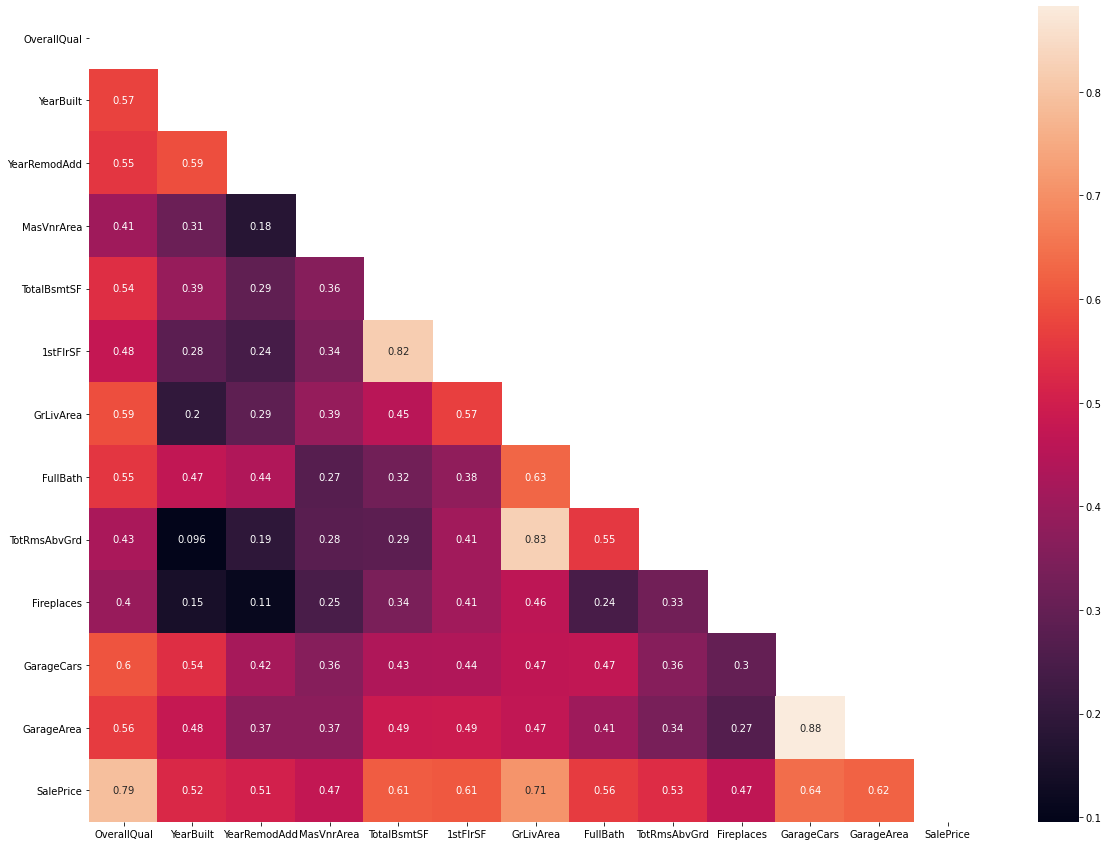

In [12]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(out1, dtype=bool))
sns.heatmap(out1,annot=True,mask=mask)

In [13]:
num_df2=num_df1[corrmat[abs(corrmat['SalePrice'])>lim].columns].copy()
num_df2.shape

(1460, 13)

In [14]:
num_df2.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [15]:
drop_list=['TotalBsmtSF','GarageArea','1stFlrSF']
num_df2.drop(drop_list,axis=1,inplace=True)
num_df2.columns,len(num_df2.columns)

(Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
        'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'SalePrice'],
       dtype='object'),
 10)

In [16]:
cat_df1.shape

(1460, 43)

In [17]:
cat_df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
drop_list1=['PoolQC','KitchenQual','Exterior1st','Exterior2nd','Electrical',\
            'MiscFeature','Alley','LandContour','LotShape',\
            'Neighborhood','Condition1','Condition2']

In [19]:
cat_df1.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
Heating           6
Foundation        6
Electrical        6
SaleCondition     6
RoofStyle         6
GarageQual        6
GarageCond        6
FireplaceQu       6
HeatingQC         5
Fence             5
MiscFeature       5
MSZoning          5
BsmtExposure      5
MasVnrType        5
LotConfig         5
BsmtCond          5
BldgType          5
BsmtQual          5
ExterCond         5
KitchenQual       4
ExterQual         4
GarageFinish      4
PoolQC            4
LandContour       4
LotShape          4
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [20]:
cat_df2=cat_df1.drop(drop_list1,axis=1)
cat_df2.nunique().sort_values(ascending=False)

SaleType         9
HouseStyle       8
RoofMatl         8
BsmtFinType1     7
GarageType       7
Functional       7
BsmtFinType2     7
SaleCondition    6
GarageCond       6
GarageQual       6
RoofStyle        6
FireplaceQu      6
Foundation       6
Heating          6
Fence            5
HeatingQC        5
MSZoning         5
BsmtCond         5
BsmtQual         5
ExterCond        5
MasVnrType       5
BldgType         5
LotConfig        5
BsmtExposure     5
ExterQual        4
GarageFinish     4
LandSlope        3
PavedDrive       3
Street           2
CentralAir       2
Utilities        2
dtype: int64

In [21]:
df1.groupby('Utilities')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Utilities,,,,,,,,
AllPub,1459.0,180950.95682,79461.599814,34900.0,129950.0,163000.0,214000.0,755000.0
NoSeWa,1.0,137500.00000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0


In [22]:
Utilities={
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1
}

cat_df2.Utilities=cat_df2.Utilities.replace(Utilities)

In [23]:
cat_df2.Fence.unique()

array([0, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [24]:
cat_df2.Fence=cat_df2.Fence.apply(lambda x: 1 if x else 0)

In [25]:
df1.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


In [26]:
cat_df2.CentralAir=cat_df2.CentralAir.apply(lambda x: 1 if x=='Y' else 0)

In [27]:
cat_df2['SalePrice']=df1['SalePrice']

In [28]:
cat_df2.groupby('Fence')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Fence,,,,,,,,
0,1179.0,187596.837998,81656.497075,35311.0,132750.0,173000.0,224700.0,755000.0
1,281.0,152912.007117,62113.736323,34900.0,123000.0,141500.0,166000.0,745000.0


In [29]:
cat_df2.groupby('MSZoning').SalePrice.mean().sort_values()

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

In [30]:
cat_df2[cat_df2.MSZoning=='C (all)']

,MSZoning,Street,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
30,C (all),Pave,4,Inside,Gtl,1Fam,2Story,Gambrel,CompShg,None,...,0,Detchd,Unf,TA,Fa,N,1,WD,Normal,40000
88,C (all),Pave,4,Corner,Gtl,1Fam,1.5Fin,Hip,CompShg,None,...,0,0,0,0,0,N,1,ConLD,Abnorml,85000
93,C (all),Pave,4,Corner,Gtl,2fmCon,2.5Unf,Hip,CompShg,None,...,Gd,Detchd,Unf,TA,TA,Y,0,WD,Normal,133900
495,C (all),Pave,4,Inside,Gtl,1Fam,1Story,Gable,CompShg,None,...,0,0,0,0,0,N,1,WD,Abnorml,34900
557,C (all),Pave,4,Inside,Mod,1Fam,1.5Fin,Gable,CompShg,None,...,0,CarPort,Unf,TA,TA,Y,0,COD,Normal,108000
711,C (all),Pave,4,Inside,Mod,1Fam,1.5Fin,Gable,CompShg,None,...,0,Detchd,RFn,TA,TA,N,0,WD,Abnorml,102776
812,C (all),Grvl,4,Inside,Mod,1Fam,1Story,Hip,CompShg,None,...,0,Basment,Unf,TA,TA,N,0,WD,Alloca,55993
916,C (all),Pave,4,Inside,Gtl,1Fam,1Story,Gable,CompShg,None,...,0,Detchd,Unf,TA,TA,Y,0,WD,Abnorml,35311
1061,C (all),Grvl,4,Inside,Gtl,1Fam,1Story,Gable,CompShg,None,...,0,Detchd,RFn,TA,TA,Y,0,ConLD,Normal,81000
1279,C (all),Pave,4,Inside,Gtl,1Fam,1.5Fin,Gable,CompShg,None,...,0,Detchd,RFn,TA,TA,Y,0,COD,Abnorml,68400


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

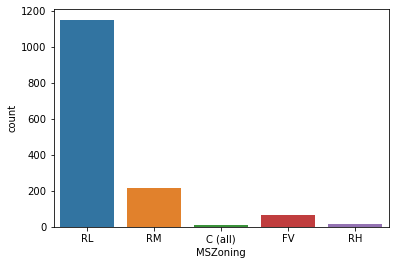

In [31]:
sns.countplot(x=df1.MSZoning)

In [32]:
replace_dict={
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    'NA':-1,
    'Y':2,
    'P':1,
    'N':0,
    'No':0,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'Ex':5,
    'Gtl':1,
    'Mod':0,
    'Sev':-1
}

In [33]:
cat_df3=cat_df2.replace(replace_dict)

In [34]:
cat_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Utilities      1460 non-null   int64 
 3   LotConfig      1460 non-null   object
 4   LandSlope      1460 non-null   int64 
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   RoofMatl       1460 non-null   object
 9   MasVnrType     1460 non-null   object
 10  ExterQual      1460 non-null   int64 
 11  ExterCond      1460 non-null   int64 
 12  Foundation     1460 non-null   object
 13  BsmtQual       1460 non-null   int64 
 14  BsmtCond       1460 non-null   int64 
 15  BsmtExposure   1460 non-null   object
 16  BsmtFinType1   1460 non-null   int64 
 17  BsmtFinType2   1460 non-null   int64 
 18  Heating        1460 non-null

In [35]:
cat_df3.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [36]:
cat_df3.Street=cat_df3.Street.apply(lambda x: 1 if x=="Pave" else -1)

In [37]:
cat_df3.BsmtFinType1.unique()

array([6, 5, 1, 3, 4, 0, 2], dtype=int64)

<AxesSubplot:>

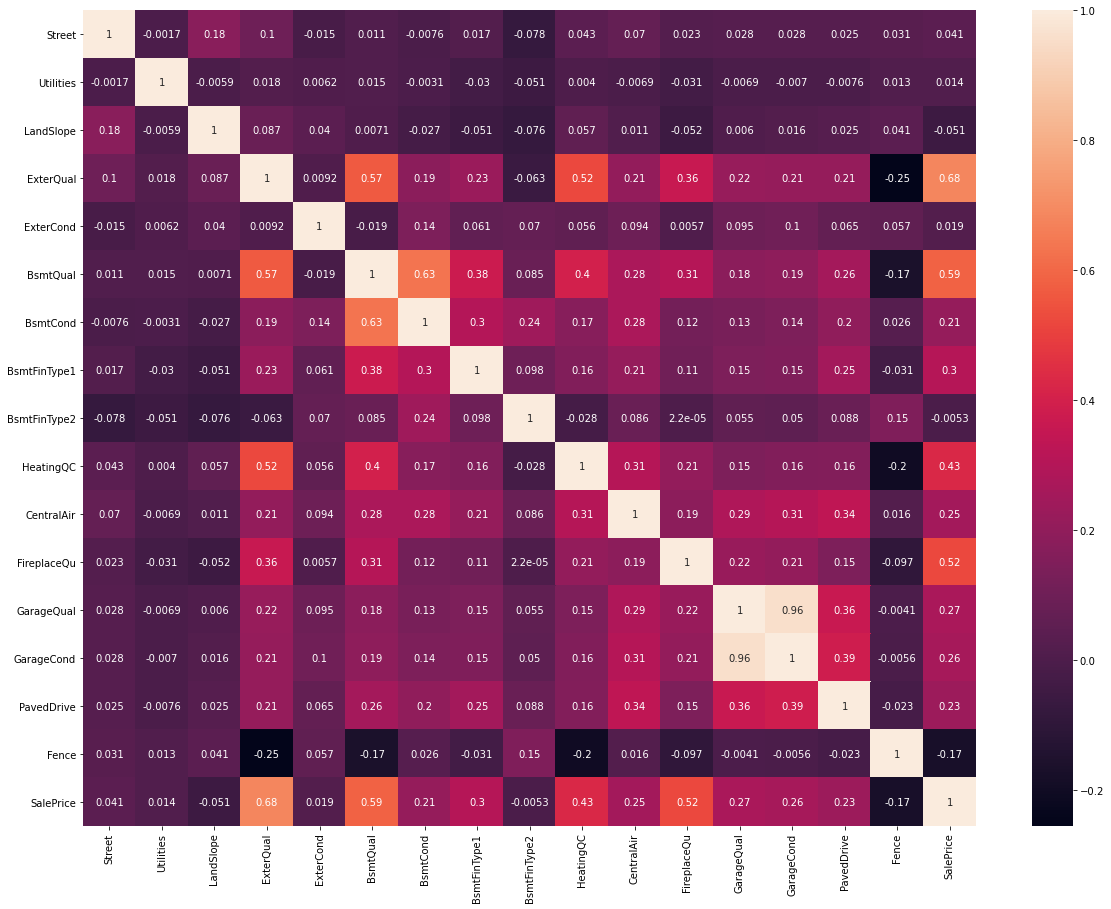

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(cat_df3.corr(),annot=True)

In [39]:
cat_left=cat_df3.select_dtypes(include='object').copy()

In [40]:
cat_left.columns

Index(['MSZoning', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'Functional', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [41]:
cat_df3.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [42]:
cat_df3.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [43]:
cat_left['SalePrice']=cat_df3.SalePrice

In [44]:
dummy_df=pd.get_dummies(cat_left,drop_first=True,dtype=np.uint8)

In [45]:
dummy_df.sample(4)

,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
34,277500,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
937,253000,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
752,217000,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
627,153000,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
dummy_df.corr()['SalePrice'].nlargest(15)

SalePrice                1.000000
Foundation_PConc         0.497734
GarageFinish_Fin         0.419678
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
BsmtExposure_4           0.307298
MSZoning_RL              0.245063
HouseStyle_2Story        0.242880
RoofStyle_Hip            0.235897
GarageType_BuiltIn       0.235449
MasVnrType_BrkFace       0.198191
GarageFinish_RFn         0.169792
RoofMatl_WdShngl         0.169324
Name: SalePrice, dtype: float64

In [47]:
dummy_df.corr()['SalePrice'].nsmallest(15)

GarageFinish_1         -0.410608
MasVnrType_None        -0.374468
GarageType_Detchd      -0.354141
Foundation_CBlock      -0.343263
MSZoning_RM            -0.288065
SaleType_WD            -0.242598
RoofStyle_Gable        -0.224744
SaleCondition_Normal   -0.153990
Foundation_Slab        -0.119740
BldgType_Duplex        -0.114655
RoofMatl_CompShg       -0.104505
BldgType_Twnhs         -0.098730
BldgType_2fmCon        -0.097348
HouseStyle_SFoyer      -0.093090
Heating_Grav           -0.092338
Name: SalePrice, dtype: float64

In [48]:
df1.GarageCars.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [49]:
df1[df1.MSZoning=='RM'].SalePrice.describe()

count       218.000000
mean     126316.830275
std       48521.689833
min       37900.000000
25%      100000.000000
50%      120500.000000
75%      140000.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [50]:
df1[df1.MSZoning=='FV'].SalePrice.describe()

count        65.000000
mean     214014.061538
std       52369.662067
min      144152.000000
25%      174000.000000
50%      205950.000000
75%      250000.000000
max      370878.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

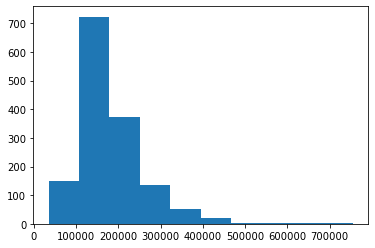

In [51]:
df1.SalePrice.hist(grid=False)

In [52]:
Q3,Q1=df1.SalePrice.quantile([0.75,0.25])
IQR=Q3-Q1
upper_limit,lower_limit=Q3+1.5*IQR,Q1-1.5*IQR
upper_limit,lower_limit

(340037.5, 3937.5)

<AxesSubplot:>

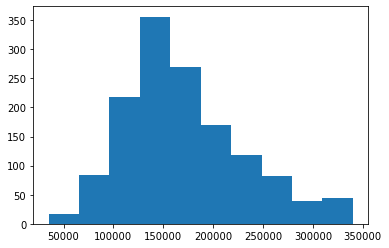

In [53]:
df2=df1[(df1.SalePrice<Q3+1.5*IQR)]
df2.SalePrice.hist(grid=False)

In [54]:
df2.SalePrice.describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

In [55]:
df2.groupby('MSZoning').SalePrice.mean().sort_values()

MSZoning
C (all)     74528.000000
RM         123470.226852
RH         131558.375000
RL         178501.301006
FV         211563.062500
Name: SalePrice, dtype: float64

In [56]:
df2.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [57]:
df2.groupby('LotConfig').SalePrice.mean().sort_values()

LotConfig
Inside     166761.011905
Corner     172306.729412
FR2        173224.086957
CulDSac    201467.639535
FR3        208475.000000
Name: SalePrice, dtype: float64

In [58]:
df2.groupby('MiscFeature').SalePrice.mean().sort_values()

MiscFeature
Othr     94000.000000
Shed    151187.612245
Gar2    170750.000000
0       170984.422305
TenC    250000.000000
Name: SalePrice, dtype: float64

In [59]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
test.MSZoning.unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [61]:
test[test.MSZoning.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [62]:
s=test.isna().sum()
s[s>0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [63]:
df2.groupby('Fence').SalePrice.mean().sort_values()

Fence
MnWw     134286.363636
GdWo     135839.301887
MnPrv    143638.200000
GdPrv    173822.758621
0        175703.624777
Name: SalePrice, dtype: float64

In [64]:
cat_df3.corr().SalePrice.sort_values(ascending=False)

SalePrice       1.000000
ExterQual       0.682639
BsmtQual        0.585207
FireplaceQu     0.520438
HeatingQC       0.427649
BsmtFinType1    0.304908
GarageQual      0.273839
GarageCond      0.263191
CentralAir      0.251328
PavedDrive      0.231357
BsmtCond        0.212607
Street          0.041036
ExterCond       0.018899
Utilities       0.014314
BsmtFinType2   -0.005323
LandSlope      -0.051152
Fence          -0.172184
Name: SalePrice, dtype: float64

In [65]:
cols=cat_df3.corr().SalePrice.sort_values(ascending=False)[1:5].index

In [66]:
final_df=pd.concat([cat_df3[cols].astype(np.int8),num_df2.astype(np.int32)],axis=1)

In [70]:
final_df.dtypes

ExterQual        int8
BsmtQual         int8
FireplaceQu      int8
HeatingQC        int8
OverallQual     int32
YearBuilt       int32
YearRemodAdd    int32
MasVnrArea      int32
GrLivArea       int32
FullBath        int32
TotRmsAbvGrd    int32
Fireplaces      int32
GarageCars      int32
SalePrice       int32
dtype: object

In [71]:
X_train,X_test,y_train,y_test=train_test_split(final_df.drop('SalePrice',axis=1),final_df['SalePrice'],test_size=0.2)

In [72]:
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8178005580444465

In [73]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8648907714885307

In [74]:
final_df.sample(4)

,ExterQual,BsmtQual,FireplaceQu,HeatingQC,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
386,3,3,0,3,5,1910,1996,0,1184,1,8,0,0,81000
977,4,4,0,5,7,2006,2007,0,1241,1,4,0,2,199900
476,3,4,3,5,6,1997,1998,215,1493,2,7,1,2,208900
1236,4,4,0,5,7,2003,2003,106,1626,2,6,0,2,175500


In [75]:
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(final_df),columns=final_df.columns)

In [76]:
X1_train,X1_test,y1_train,y1_test=train_test_split(scaled_df.drop('SalePrice',axis=1),scaled_df['SalePrice'],test_size=0.2)

In [77]:
reg1=LinearRegression()
reg1.fit(X1_train,y1_train)
reg1.score(X1_test,y1_test)

0.7770119341924597

In [78]:
X_scaled=scaled_df.drop('SalePrice',axis=1)
y=scaled_df.SalePrice

In [79]:
X_not_scaled=final_df.drop('SalePrice',axis=1)
y_not_scaled=final_df.SalePrice

In [80]:
models=[Lasso(),Ridge(0.01),LinearRegression(),RandomForestRegressor() \
         ,DecisionTreeRegressor(),SVR(C=0.3894736842105263,kernel='linear'),\
        KNeighborsRegressor()]

score=[]
for model in models:
    score.append(cross_val_score(model,X_not_scaled,y_not_scaled,n_jobs=-1).mean())
pd.DataFrame(score,index=models).sort_values(by=0,ascending=False)

,0
RandomForestRegressor(),0.813276
Lasso(),0.773598
Ridge(alpha=0.01),0.773597
LinearRegression(),0.773597
"SVR(C=0.3894736842105263, kernel='linear')",0.666783
DecisionTreeRegressor(),0.632436
KNeighborsRegressor(),0.606468


In [81]:
models=[Lasso(),Ridge(0.01),LinearRegression(),RandomForestRegressor() \
         ,DecisionTreeRegressor(),SVR(C=0.3894736842105263,kernel='linear'),\
        KNeighborsRegressor()]

score=[]
for model in models:
    score.append(cross_val_score(model,X_scaled,y,n_jobs=-1).mean())
pd.DataFrame(score,index=models).sort_values(by=0,ascending=False)

,0
RandomForestRegressor(),0.815620
Ridge(alpha=0.01),0.773615
LinearRegression(),0.773597
KNeighborsRegressor(),0.759633
"SVR(C=0.3894736842105263, kernel='linear')",0.728491
DecisionTreeRegressor(),0.639327
Lasso(),-0.004672


In [82]:
for i in np.linspace(.01,.1,10): 
    svr=Ridge(alpha=i)
    svr.fit(X1_train,y1_train)
    print(i," : ",svr.score(X1_test,y1_test))

0.01  :  0.7769792030669919
0.020000000000000004  :  0.7769462851960358
0.030000000000000006  :  0.7769131914203765
0.04000000000000001  :  0.7768799321833583
0.05000000000000001  :  0.7768465175455721
0.06000000000000001  :  0.7768129571989555
0.07  :  0.7767792604803323
0.08  :  0.7767454363844161
0.09000000000000001  :  0.7767114935762994
0.1  :  0.7766774404034541


In [84]:
svr=LinearRegression()
svr.fit(X1_train,y1_train)
svr.score(X1_test,y1_test)

0.7770119341924597

In [85]:
rf=RandomForestRegressor()
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)

0.814986085627606

In [86]:
y_predicted=rf.predict(X1_test)

In [87]:
np.mean(np.square(y1_test-y_predicted))

0.0019779314845561786

In [88]:
np.mean(np.absolute(y1_test-y_predicted))

0.030195010332559627

In [89]:
final_df.columns

Index(['ExterQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'SalePrice'],
      dtype='object')

In [97]:
X2=final_df.drop(['SalePrice'],axis=1)
y2=final_df.SalePrice

In [98]:
score=[]
for model in models:
    score.append(cross_val_score(model,X2,y2,n_jobs=-1).mean())
pd.DataFrame(score,index=models).sort_values(by=0,ascending=False)

,0
RandomForestRegressor(),0.820605
Lasso(),0.773598
Ridge(alpha=0.01),0.773597
LinearRegression(),0.773597
"SVR(C=0.3894736842105263, kernel='linear')",0.666783
DecisionTreeRegressor(),0.647899
KNeighborsRegressor(),0.606468


In [100]:
def rmse(truth,predicted):
    return np.sqrt(np.mean(np.square(np.log(truth)-np.log(predicted))))

In [110]:
def mse(truth,predicted):
    return np.mean(np.square(truth-predicted))

In [123]:
final_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:ylabel='SalePrice'>

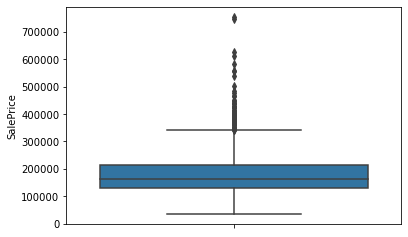

In [125]:
sns.boxplot(y=final_df.SalePrice)

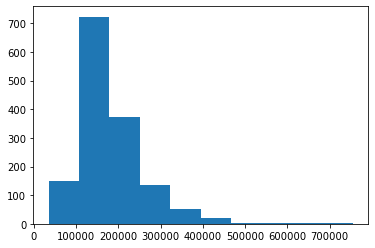

In [127]:
plt.hist(final_df.SalePrice)
plt.show()

In [128]:
final_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [134]:
IQR=(final_df.SalePrice.quantile(.75)-final_df.SalePrice.quantile(.25))
upper=final_df.SalePrice.quantile(.75)+1.5*IQR
lower=final_df.SalePrice.quantile(.25)-1.5*IQR
upper,lower

(340037.5, 3937.5)

In [137]:
final_df.shape

(1460, 14)

In [160]:
final2_df=final_df[final_df.SalePrice<upper]

In [161]:
final2_df.shape

(1399, 14)

In [154]:
def train(df,model):
    X_train,X_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df.SalePrice,random_state=0,test_size=.2)                                              
    mod=model()
    mod.fit(X_train,y_train)
    print('score train ',mod.score(X_train,y_train))
    print('score test ',mod.score(X_test,y_test))
    predicted=mod.predict(X_test)
    print('rmse : ',rmse(y_test,predicted))
    print('mse : ',mse(y_test,predicted))

In [162]:
train(final2_df,RandomForestRegressor)

score train  0.9744800636028911
score test  0.8054407255170507
rmse :  0.17141495138993948
mse :  748667586.3390822


In [163]:
rf=RandomForestRegressor()
rf.fit(final2_df.drop('SalePrice',axis=1),final2_df.SalePrice)
rf.score(final2_df.drop('SalePrice',axis=1),final2_df.SalePrice)

0.9750734422481229

In [164]:
print('rmse : ',rmse(final2_df.SalePrice,rf.predict(final2_df.drop('SalePrice',axis=1))))

rmse :  0.06261824708076114


In [165]:
test_df=pd.read_csv('test.csv')
test_df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
365,1826,50,RM,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
275,1736,20,RL,65.0,7150,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
226,1687,80,RL,59.0,9434,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
1045,2506,20,RL,71.0,9178,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


In [170]:
interest_df=test_df[final_df.columns[:-1]]

In [171]:
interest_df.isna().sum()

ExterQual         0
BsmtQual         44
FireplaceQu     730
HeatingQC         0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        1
dtype: int64

In [174]:
interest_df2=interest_df.fillna(0).replace(replace_dict)

In [175]:
sub_df=rf.predict(interest_df2)

In [181]:
pred=pd.DataFrame(sub_df,columns=['SalePrice'])

In [182]:
test_df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
667,2128,50,RM,63.0,4347,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
200,1661,60,RL,110.0,14257,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1227,2688,20,RL,85.0,10936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,New,Partial
396,1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [183]:
merged=pd.concat([test_df.Id,pred],axis=1)
merged.head()

,Id,SalePrice
0,1461,118576.00
1,1462,136992.00
2,1463,183692.41
3,1464,182565.82
4,1465,194523.96


In [186]:
merged.to_csv('sub.csv',index=False)

## NEW

In [194]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [195]:
df.fillna(-1,inplace=True)

In [196]:
num_df1=df.select_dtypes(exclude='object')
num_df1.shape

(1460, 38)

In [197]:
cat_df1=df.select_dtypes(include='object')
cat_df1.shape

(1460, 43)

In [198]:
num_df1.sample(4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1225,1226,80,65.0,10482,6,8,1958,1958,63.0,507,...,224,0,0,0,0,0,0,6,2007,145000
576,577,50,52.0,6292,7,7,1928,1950,0.0,0,...,0,50,0,0,0,0,0,8,2009,145000
943,944,90,100.0,25000,5,4,1967,1967,0.0,0,...,0,0,0,0,0,0,0,6,2007,143000
593,594,120,-1.0,4435,6,5,2003,2003,170.0,685,...,140,0,0,0,0,0,0,5,2009,140000


In [199]:
cat_df1.sample(4)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
633,RL,Pave,-1,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,-1,-1,-1,WD,Normal
1242,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,-1,MnPrv,-1,WD,Family
639,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
1250,RL,Pave,-1,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal


In [200]:
num_df1.corr().SalePrice.sort_values(ascending=False)[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
replace_dict={
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    'NA':-1,
    'Y':2,
    'P':1,
    'N':0,
    'No':0,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'Ex':5,
    'Gtl':1,
    'Mod':0,
    'Sev':-1,
    'Grvl':0,
    'Pave':1
    
}

In [201]:
cat_df1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [207]:
cat_df1.GarageCond.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', -1, 'LwQ'], dtype=object)

In [203]:
cat_df1.Alley.unique()

array([-1, 'Grvl', 'Pave'], dtype=object)